In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Генерация нечетких треугольных данных
def generate_fuzzy_triangular_data(n_samples=50, a=2, b=30, noise_sigma=2, random_state=1):
    np.random.seed(random_state)
    X = np.random.uniform(1, 20, size=(n_samples, 1))
    y_central = a * X.flatten() + b + np.random.normal(0, noise_sigma/2, n_samples)  # Центральные значения
    noise = np.random.normal(0, noise_sigma, n_samples)
    y_upper = y_central + abs(noise)
    y_lower = y_central - abs(noise)
    return X, y_central, y_lower, y_upper

In [35]:
# Реализация нечеткой регрессии с использованием МНК
def fuzzy_least_squares(X, y_central, y_lower, y_upper):
    # Добавляем свободный член (константу) в матрицу признаков
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Решаем задачу МНК для центральных значений
    beta_c = np.linalg.lstsq(X, y_central, rcond=None)[0]
    
    # Оцениваем размах нечеткости
    beta_w = np.linalg.lstsq(X, y_upper - y_central, rcond=None)[0]
    
    return beta_c, beta_w

In [36]:
# Генерация данных
X, y_central, y_lower, y_upper = generate_fuzzy_triangular_data()

# Применение метода
beta_c, beta_w = fuzzy_least_squares(X, y_central, y_lower, y_upper)
beta_c, beta_w

(array([29.98710249,  2.01432043]), array([1.2340545 , 0.01248739]))

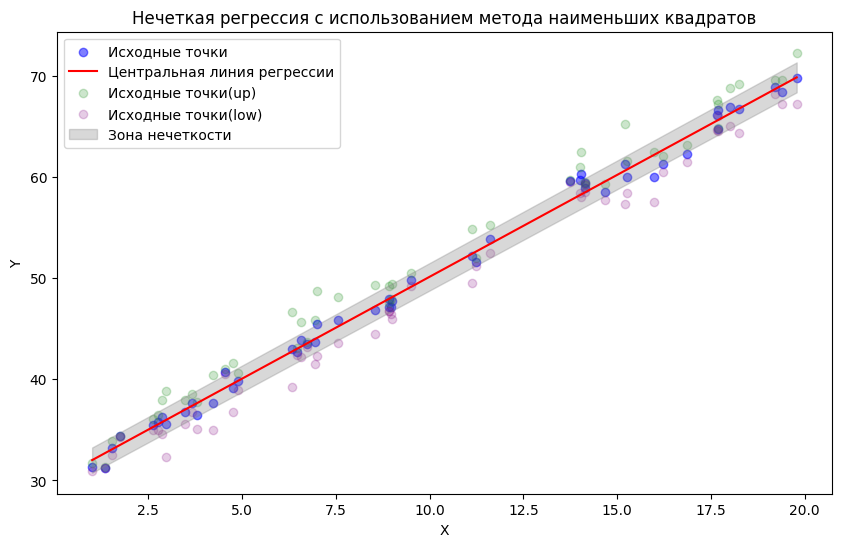

In [37]:
# Визуализация результатов
X_sorted = np.sort(X, axis=0)
X_sorted_with_bias = np.hstack([np.ones((X_sorted.shape[0], 1)), X_sorted])
y_pred_central = X_sorted_with_bias @ beta_c

y_pred_upper = y_pred_central + np.hstack([np.ones((X_sorted.shape[0], 1)), X_sorted]) @ beta_w
y_pred_lower = y_pred_central - np.hstack([np.ones((X_sorted.shape[0], 1)), X_sorted]) @ beta_w

plt.figure(figsize=(10, 6))
plt.scatter(X, y_central, label='Исходные точки', color='blue', alpha=0.5)
plt.plot(X_sorted, y_pred_central, label='Центральная линия регрессии', color='red')
plt.scatter(X, y_upper, label='Исходные точки(up)', color='green', alpha=0.2)
plt.scatter(X, y_lower, label='Исходные точки(low)', color='purple', alpha=0.2)
plt.fill_between(X_sorted.flatten(), y_pred_lower, y_pred_upper, color='gray', alpha=0.3, label='Зона нечеткости')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Нечеткая регрессия с использованием метода наименьших квадратов')
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Оценка качества модели
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2
    
indexes = np.argsort(X, axis=0)[:, 0]

# Оценка нечеткой регрессии
mae_fuzzy, mse_fuzzy, r2_fuzzy = evaluate_model(y_central[indexes], y_pred_central)
print(f"Нечеткая регрессия: MAE = {mae_fuzzy}, MSE = {mse_fuzzy}, R2 = {r2_fuzzy}")
mae_fuzzy, mse_fuzzy, r2_fuzzy = evaluate_model(y_upper[indexes], y_pred_upper)
print(f"Нечеткая регрессия (up): MAE = {mae_fuzzy}, MSE = {mse_fuzzy}, R2 = {r2_fuzzy}")
mae_fuzzy, mse_fuzzy, r2_fuzzy = evaluate_model(y_lower[indexes], y_pred_lower)
print(f"Нечеткая регрессия (low): MAE = {mae_fuzzy}, MSE = {mse_fuzzy}, R2 = {r2_fuzzy}")

Нечеткая регрессия: MAE = 0.720043698335703, MSE = 0.8183388570266158, R2 = 0.9940409212250285
Нечеткая регрессия (up): MAE = 1.1138421113765817, MSE = 1.9306008512092763, R2 = 0.9862234185102924
Нечеткая регрессия (low): MAE = 1.0549056634410798, MSE = 1.7786277704247246, R2 = 0.9869792443309251
